# Projeto de Previsão de Rotatividade de Funcionários (Attrition)

Este notebook organiza scripts, análises e resultados do projeto de Machine Learning para prever a saída de funcionários.

## 1. Importar Bibliotecas

Nesta seção, vamos importar as principais bibliotecas para análise e modelagem de dados em Python.

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

## 2. Importar os arquivos no notebook

In [3]:
df = pd.read_csv("../data/raw/rh_data.csv")

### 2.1. Checando informações no DataFrame

In [4]:
print("Formato da base:", df.shape)

Formato da base: (4410, 24)


In [5]:
pd.set_option("display.max_rows", None)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [6]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [7]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


## 3. Limpar dados

### 3.1. Identificar valores nulos

In [8]:
# Ver quantidade de valores nulos por coluna
print(df.isnull().sum())

# Ver proporção (% de nulos)
print(df.isnull().mean() * 100)

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64
Age                        0.000000
Attrition                  0.000000
BusinessTravel             0.000000
Department                 0.000000
DistanceFromHome           0.000000
Education                  0.000000
EducationField             0.000000
EmployeeCount  

Na variável NumCompaniesWorked eles serão substituídos por 1, visto que só sabemos que eles trabalham nessa empresa atualmente. 

* Nesse momento também haverá a substituição de valores 0 por 1. 

In [9]:
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(1)

In [10]:
df.loc[df['NumCompaniesWorked'] == 0, 'NumCompaniesWorked'] = 1


Na variável TotalWorkingYears será substituído pelo mesmo valor em YearsAtCompany, já que sabemos a quanto tempo o funcionário está na empresa. 

In [11]:
df["TotalWorkingYears"] = np.where(
    df["TotalWorkingYears"].isnull(), 
    df["YearsAtCompany"], 
    df["TotalWorkingYears"]
)

In [12]:
print(df.isnull().sum())

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64


### 3.2. Remover duplicados

In [13]:
duplicados = df[df.duplicated(keep='first')]
print(duplicados)

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeID, Gender, JobLevel, JobRole, MaritalStatus, MonthlyIncome, NumCompaniesWorked, Over18, PercentSalaryHike, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 24 columns]


In [14]:
df.drop_duplicates(keep='first', inplace=True) 

### 3.3. Identificar a variável resposta

A variável resposta "attrition" está no formato de texto ("Yes" e "No"), será necessário transformá-la em valores numéricos antes de treinar o modelo. Eles serão separados para não transformar junto com outras variáveis. 

In [15]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [16]:
y = df["Attrition"].map({"Yes": 1, "No": 0})
X = df.drop(columns=["Attrition"])

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

### 3.4. Transformar variáveis categóricas (Label Encoding)

In [17]:
# Identificar colunas categóricas
cat_cols = X.select_dtypes(include="object").columns
print("Colunas categóricas:", cat_cols)

le = LabelEncoder()

# Aplicar LabelEncoder em cada coluna categórica
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

Colunas categóricas: Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18'],
      dtype='object')


### 3.5. Rejuntar X e Y

In [18]:
df_clean = pd.concat([X, y], axis=1)

### 3.6. Identificar e gerenciar dados fora do escopo da análise

In [19]:
# Verificar colunas com um único valor
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"Coluna {col} é constante e pode ser removida.")

Coluna EmployeeCount é constante e pode ser removida.
Coluna Over18 é constante e pode ser removida.
Coluna StandardHours é constante e pode ser removida.


In [20]:
df = df.drop(columns=["EmployeeCount", "Over18", "StandardHours"])

## 4. Criar novas variáveis

In [21]:
# Faixa Etária

df["AgeGroup"] = pd.cut(df["Age"], bins=[18, 30, 40, 50, 60], 
                        labels=["18-30", "31-40", "41-50", "51-60"])

In [22]:
# Tempo de caso relativo: proporção entre YearsAtCompany e TotalWorkingYears

df["PercYearsAtCompany"] = df["YearsAtCompany"] / (df["TotalWorkingYears"] + 1)

In [23]:
# Tempo médio por empresa

df['AvgYearsPerCompany'] = df['TotalWorkingYears'] / (df['NumCompaniesWorked'].replace(0,1))

In [24]:
# Taxa de promoção

df['PromotionRate'] = df['YearsSinceLastPromotion'] / (df['TotalWorkingYears'] + 1)

In [25]:
# Categoria de renda: agrupar MonthlyIncome em faixas

df["IncomeGroup"] = pd.qcut(df["MonthlyIncome"], q=4, labels=["Baixo", "Médio", "Alto", "Muito Alto"])

In [26]:
# Distância de casa (binário: 0=perto, 1=longe)

df['FarFromHome'] = (df['DistanceFromHome'] > df['DistanceFromHome'].median()).astype(int)

In [27]:
# Experiência em múltiplas empresas: binária (se já trabalhou em mais de 3 empresas)

df["MultiCompanyExp"] = (df["NumCompaniesWorked"] > 3).astype(int)

In [28]:
# Proporção de tempo de carreira na empresa atual

df['CompanyExperienceRatio'] = df['YearsAtCompany'] / (df['TotalWorkingYears'] + 1)

In [29]:
# Gap desde última promoção:
## Criar indicador se ficou >5 anos sem promoção.

df["LongTimeNoPromotion"] = (df["YearsSinceLastPromotion"] > 5).astype(int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4410 non-null   int64   
 1   Attrition                4410 non-null   int64   
 2   BusinessTravel           4410 non-null   object  
 3   Department               4410 non-null   object  
 4   DistanceFromHome         4410 non-null   int64   
 5   Education                4410 non-null   int64   
 6   EducationField           4410 non-null   object  
 7   EmployeeID               4410 non-null   int64   
 8   Gender                   4410 non-null   object  
 9   JobLevel                 4410 non-null   int64   
 10  JobRole                  4410 non-null   object  
 11  MaritalStatus            4410 non-null   object  
 12  MonthlyIncome            4410 non-null   int64   
 13  NumCompaniesWorked       4410 non-null   float64 
 14  PercentS

## 5. Dividir a base em treino e teste

In [31]:
# Definindo variáveis
X = df.drop(columns=["Attrition"])  # features (explicativas)
y = df["Attrition"]                 # target (variável resposta)

In [32]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% teste, 80% treino
    random_state=42,      # seed para reprodutibilidade
    stratify=y            # mantém a proporção do target
)

In [33]:
print("Tamanho do treino:", X_train.shape)
print("Tamanho do teste:", X_test.shape)
print("Proporção no treino:", y_train.value_counts(normalize=True))
print("Proporção no teste:", y_test.value_counts(normalize=True))

Tamanho do treino: (3528, 29)
Tamanho do teste: (882, 29)
Proporção no treino: Attrition
0    0.838719
1    0.161281
Name: proportion, dtype: float64
Proporção no teste: Attrition
0    0.839002
1    0.160998
Name: proportion, dtype: float64


## 6. Fazer uma análise exploratória - EDA

### 6.1. Agrupar e visualizar dados de acordo com variáveis categóricas

In [52]:
df.select_dtypes(include='object').columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [53]:
df.select_dtypes(include='category').columns

Index(['AgeGroup', 'IncomeGroup'], dtype='object')

In [54]:
# Comparar médias das variáveis numéricas entre quem saiu (1) e ficou (0)

df.groupby('Attrition').mean(numeric_only=True)

,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PercYearsAtCompany,AvgYearsPerCompany,PromotionRate,FarFromHome,MultiCompanyExp,CompanyExperienceRatio,LongTimeNoPromotion
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,9.227088,2.919708,2208.139497,2.068938,65672.595296,2.781563,15.157340,0.796431,11.859151,...,7.369019,2.234388,4.367397,0.593643,6.520056,0.173571,0.472019,0.293593,0.593643,0.145985
1,33.607595,9.012658,2.877637,2191.767932,2.037975,61682.616034,3.022504,15.481013,0.780591,8.240506,...,5.130802,1.945148,2.852321,0.522314,4.212375,0.186326,0.476793,0.350211,0.522314,0.147679


In [55]:
# Diferença de médias entre os grupos

mean_diff = df.groupby('Attrition').mean(numeric_only=True).diff().iloc[-1].sort_values(ascending=False)
print(mean_diff)

PercentSalaryHike             0.323673
NumCompaniesWorked            0.240941
MultiCompanyExp               0.056618
PromotionRate                 0.012754
FarFromHome                   0.004774
LongTimeNoPromotion           0.001694
StockOptionLevel             -0.015841
JobLevel                     -0.030963
Education                    -0.042071
CompanyExperienceRatio       -0.071329
PercYearsAtCompany           -0.071329
TrainingTimesLastYear        -0.173242
DistanceFromHome             -0.214430
YearsSinceLastPromotion      -0.289240
YearsWithCurrManager         -1.515076
YearsAtCompany               -2.238217
AvgYearsPerCompany           -2.307681
TotalWorkingYears            -3.618645
Age                          -3.953638
EmployeeID                  -16.371565
MonthlyIncome             -3989.979262
Name: 1, dtype: float64


#### 6.1.1. Departament

In [56]:
attrition_by_dept = df.groupby('Department')['Attrition'].mean().sort_values(ascending=False)
print(attrition_by_dept)

Department
Human Resources           0.301587
Research & Development    0.157128
Sales                     0.150224
Name: Attrition, dtype: float64


In [57]:
pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100

Attrition,0,1
Department,,
Human Resources,69.841270,30.158730
Research & Development,84.287201,15.712799
Sales,84.977578,15.022422


#### 6.1.2. Marital Status

In [58]:
attrition_by_marital = df.groupby('MaritalStatus')['Attrition'].mean().sort_values(ascending=False)
print(attrition_by_marital)

MaritalStatus
Single      0.255319
Married     0.124814
Divorced    0.100917
Name: Attrition, dtype: float64


In [59]:
pd.crosstab(df['MaritalStatus'], df['Attrition'], normalize='index') * 100

Attrition,0,1
MaritalStatus,,
Divorced,89.908257,10.091743
Married,87.518574,12.481426
Single,74.468085,25.531915


#### 6.1.3. Age Group

In [60]:
attrition_by_age = df.groupby('AgeGroup')['Attrition'].mean().sort_values(ascending=False)
print(attrition_by_age)

AgeGroup
18-30    0.253968
31-40    0.137318
51-60    0.125874
41-50    0.105590
Name: Attrition, dtype: float64


C:\Users\Notebook\AppData\Local\Temp\ipykernel_11224\3131432480.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_age = df.groupby('AgeGroup')['Attrition'].mean().sort_values(ascending=False)


In [61]:
pd.crosstab(df['AgeGroup'], df['Attrition'], normalize='index') * 100

Attrition,0,1
AgeGroup,,
18-30,74.603175,25.396825
31-40,86.268174,13.731826
41-50,89.440994,10.559006
51-60,87.412587,12.587413


#### 6.1.4. Job Role

In [62]:
attrition_job_role = df.groupby('JobRole')['Attrition'].mean().sort_values(ascending=False)
print(attrition_job_role)

JobRole
Research Director            0.237500
Research Scientist           0.181507
Sales Executive              0.168712
Laboratory Technician        0.162162
Healthcare Representative    0.145038
Sales Representative         0.144578
Manager                      0.137255
Human Resources              0.134615
Manufacturing Director       0.110345
Name: Attrition, dtype: float64


In [63]:
pd.crosstab(df['JobRole'], df['Attrition'], normalize='index') * 100

Attrition,0,1
JobRole,,
Healthcare Representative,85.496183,14.503817
Human Resources,86.538462,13.461538
Laboratory Technician,83.783784,16.216216
Manager,86.274510,13.725490
Manufacturing Director,88.965517,11.034483
Research Director,76.250000,23.750000
Research Scientist,81.849315,18.150685
Sales Executive,83.128834,16.871166
Sales Representative,85.542169,14.457831


#### 6.1.5. Business Travel

In [64]:
attrition_business_trave = df.groupby('BusinessTravel')['Attrition'].mean().sort_values(ascending=False)
print(attrition_business_trave)

BusinessTravel
Travel_Frequently    0.249097
Travel_Rarely        0.149569
Non-Travel           0.080000
Name: Attrition, dtype: float64


In [65]:
pd.crosstab(df['BusinessTravel'], df['Attrition'], normalize='index') * 100

Attrition,0,1
BusinessTravel,,
Non-Travel,92.000000,8.000000
Travel_Frequently,75.090253,24.909747
Travel_Rarely,85.043145,14.956855


#### 6.1.6. In Come Group

In [66]:
attrition_in_come = df.groupby('IncomeGroup')['Attrition'].mean().sort_values(ascending=False)
print(attrition_in_come)

IncomeGroup
Alto          0.187500
Baixo         0.181572
Médio         0.142077
Muito Alto    0.133515
Name: Attrition, dtype: float64


C:\Users\Notebook\AppData\Local\Temp\ipykernel_11224\2920599376.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_in_come = df.groupby('IncomeGroup')['Attrition'].mean().sort_values(ascending=False)


In [67]:
pd.crosstab(df['IncomeGroup'], df['Attrition'], normalize='index') * 100

Attrition,0,1
IncomeGroup,,
Baixo,81.842818,18.157182
Médio,85.792350,14.207650
Alto,81.250000,18.750000
Muito Alto,86.648501,13.351499


#### 6.1.7. Visualização

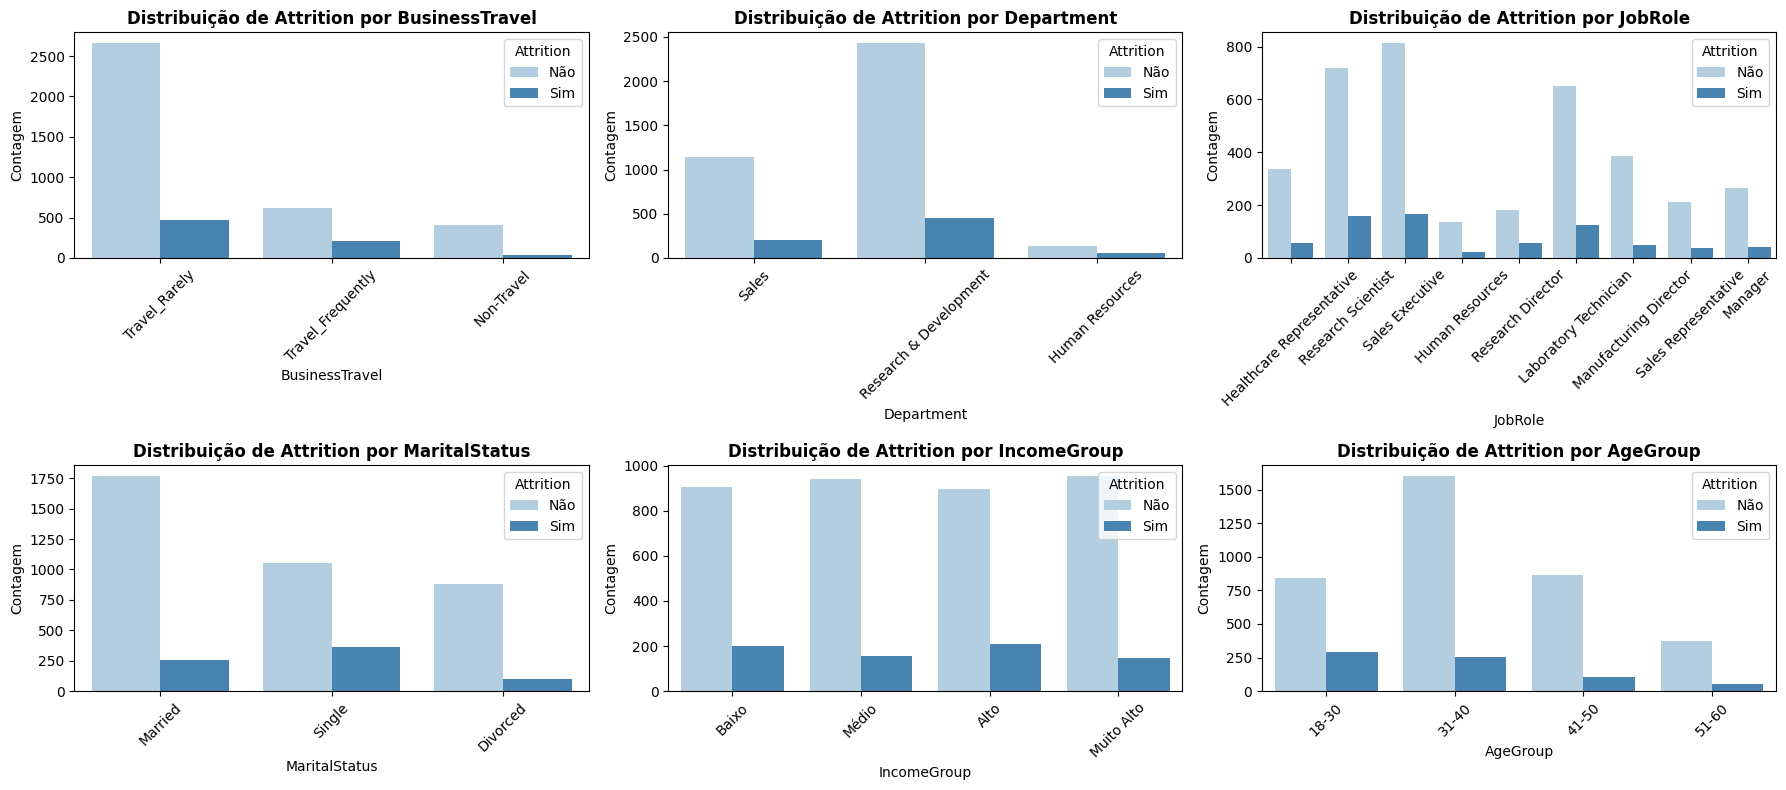

In [68]:
# Lista de variáveis categóricas
categorical_cols = ['BusinessTravel', 'Department',
                    'JobRole', 'MaritalStatus', 
                    'IncomeGroup', 'AgeGroup']

# Define número de colunas e linhas
n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

# Cria a figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Loop pelas variáveis categóricas
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='Attrition', palette='Blues', ax=axes[i])
    axes[i].set_title(f"Distribuição de Attrition por {col}", fontsize=12, fontweight="bold")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Contagem")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Attrition', labels=['Não', 'Sim'])

# Remove eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\Notebook\AppData\Local\Temp\ipykernel_11224\2133086354.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop = df.groupby(col)['Attrition'].mean() * 100
C:\Users\Notebook\AppData\Local\Temp\ipykernel_11224\2133086354.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop = df.groupby(col)['Attrition'].mean() * 100


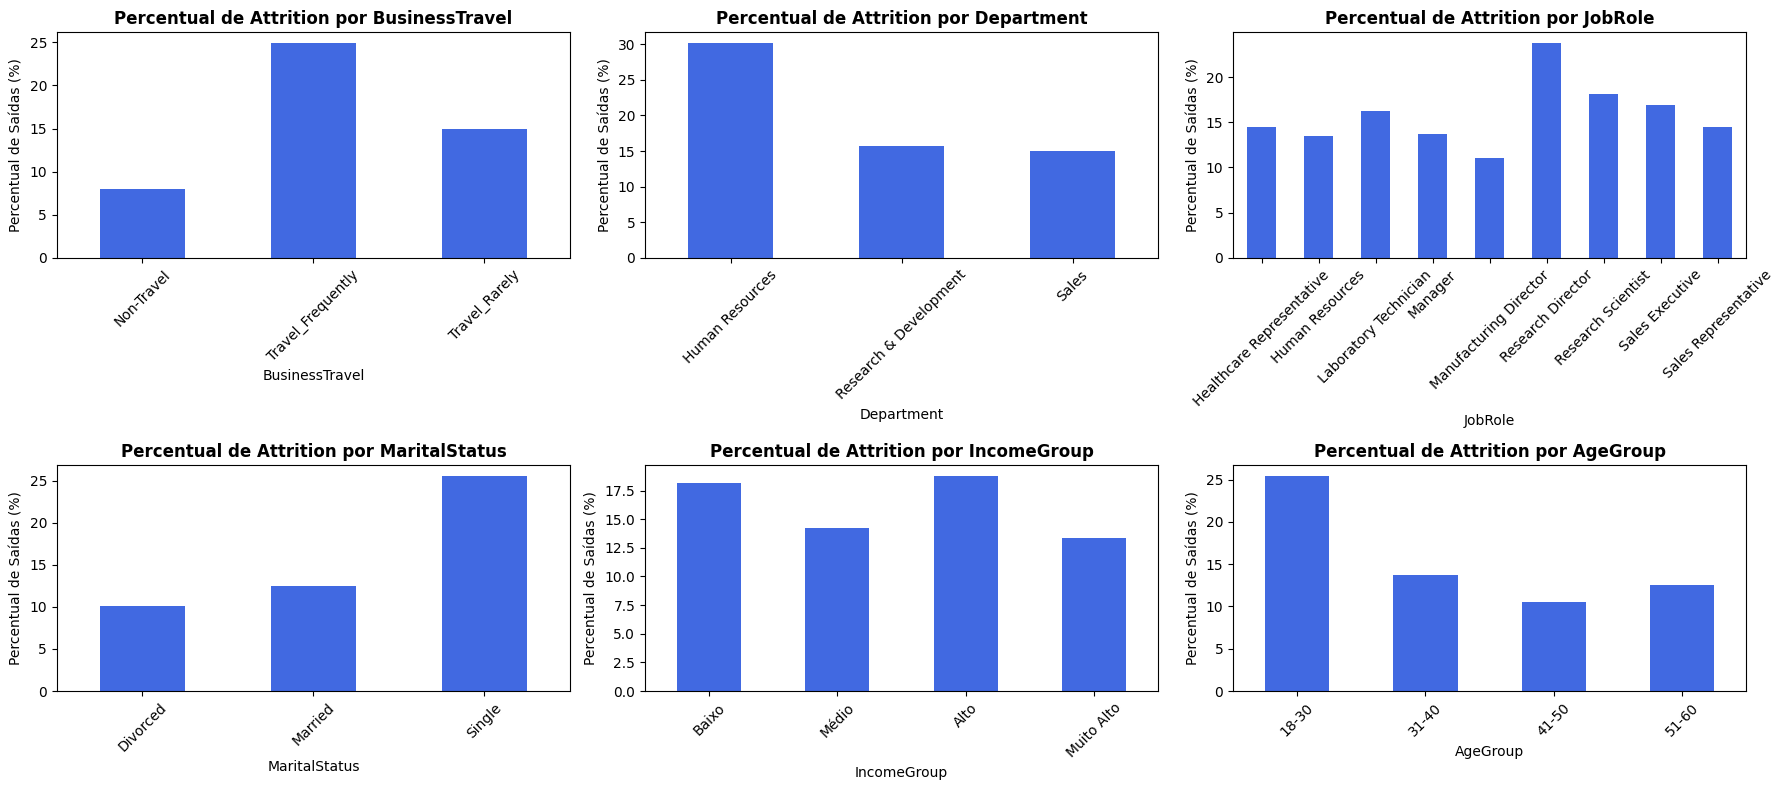

In [69]:
# Variáveis categóricas que queremos analisar
categorical_cols = ['BusinessTravel', 'Department',
                    'JobRole', 'MaritalStatus', 
                    'IncomeGroup', 'AgeGroup']

# Número de colunas e linhas para o layout
n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

# Cria a figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Loop pelas variáveis categóricas
for i, col in enumerate(categorical_cols):
    # Calcula percentual de saídas para cada categoria
    prop = df.groupby(col)['Attrition'].mean() * 100
    
    # Plota o gráfico de barras no eixo correspondente
    prop.plot(kind='bar', ax=axes[i], color='royalblue')
    
    axes[i].set_title(f"Percentual de Attrition por {col}", fontsize=12, fontweight="bold")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Percentual de Saídas (%)")
    axes[i].tick_params(axis='x', rotation=45)

# Remove eixos extras, se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Avaliação: quando verificado a taxa de saída por derpartamento, por exemplo, pode ser observado que Human Resources tem um pulo, tendo em vista a proporção de saídas comparada a quantidade de funcionários.

### 6.2. Aplicar medidas de tendência central

In [86]:
# Selecionar apenas colunas numéricas relevantes para análise de tendência central
numeric_cols = [
    'Age', 'DistanceFromHome', 'Education', 'MonthlyIncome', 'NumCompaniesWorked',
    'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
    'StockOptionLevel', 'JobLevel', 'AvgYearsPerCompany',
    'PromotionRate', 'FarFromHome', 'MultiCompanyExp', 'CompanyExperienceRatio', 'LongTimeNoPromotion'
]

In [87]:
central_tendency_dic = {}

for col in numeric_cols:
    if col in df.columns:
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode()
        mode_val = mode.iloc[0] if not mode.empty else None
        std_dev = df[col].std()
        central_tendency_dic[col] = {
            'Mean': mean,
            'Median': median,
            'Mode': mode_val,
            'Standard Deviation': std_dev
        }

df_central_tendency_dic = pd.DataFrame(central_tendency_dic).T
df_central_tendency_dic

,Mean,Median,Mode,Standard Deviation
Age,36.923810,36.000000,35.0,9.133301
DistanceFromHome,9.192517,7.000000,2.0,8.105026
Education,2.912925,3.000000,3.0,1.023933
MonthlyIncome,65029.312925,49190.000000,23420.0,47068.888559
NumCompaniesWorked,2.820408,2.000000,1.0,2.372910
PercentSalaryHike,15.209524,14.000000,11.0,3.659108
TotalWorkingYears,11.275737,10.000000,10.0,7.780539
TrainingTimesLastYear,2.799320,3.000000,2.0,1.288978
YearsAtCompany,7.008163,5.000000,5.0,6.125135
YearsSinceLastPromotion,2.187755,1.000000,0.0,3.221699


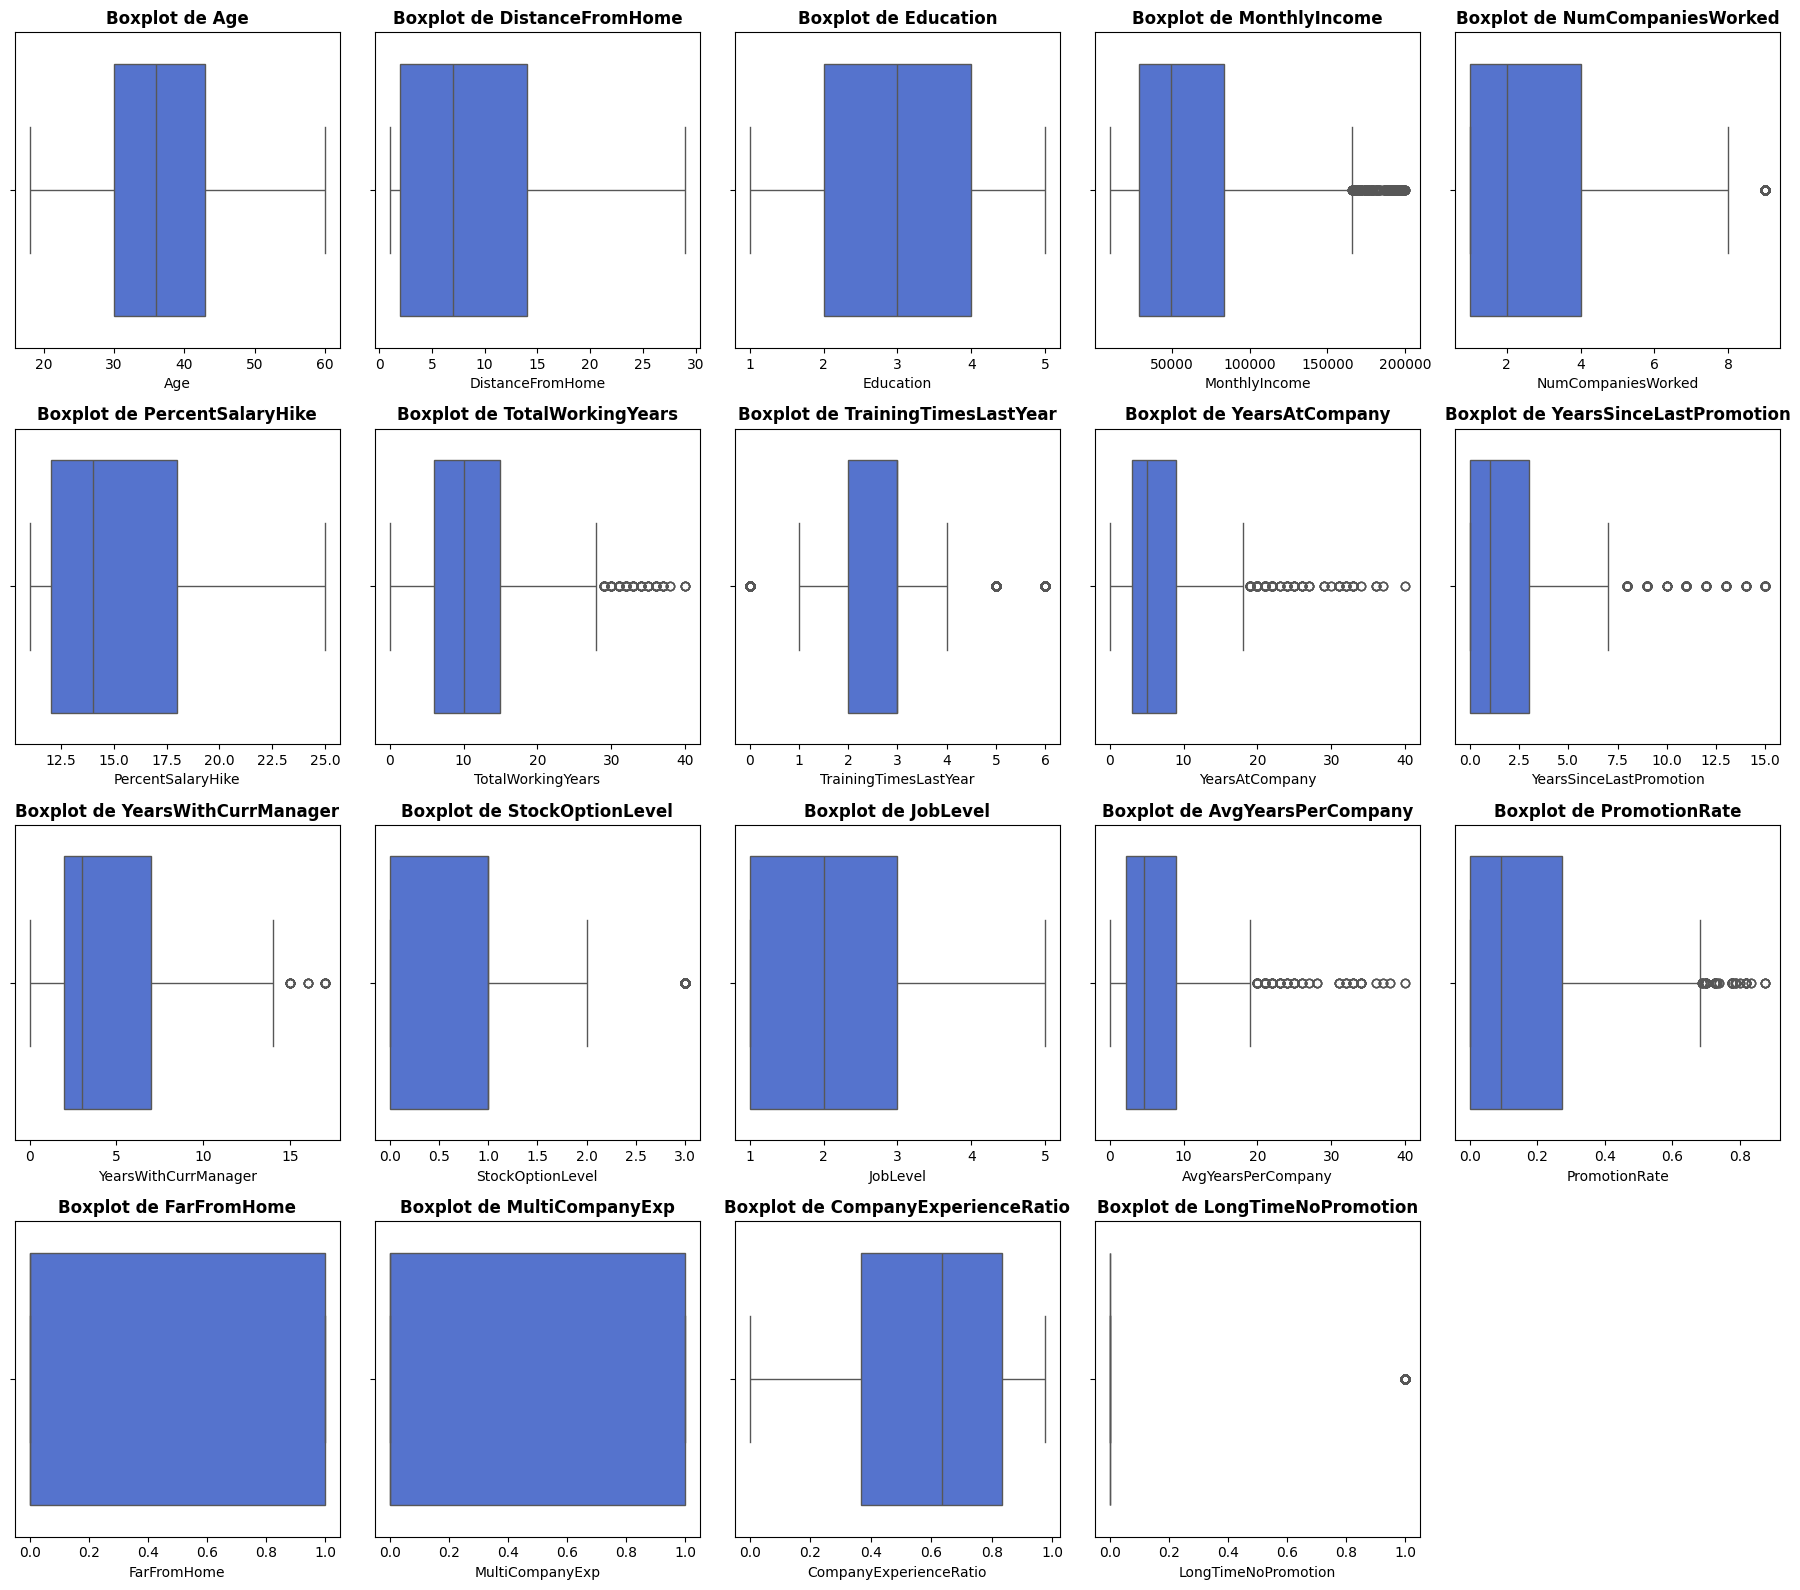

In [90]:
n_cols = 5
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if col in df.columns:
        sns.boxplot(x=df[col], color="royalblue", ax=axes[i])
        axes[i].set_title(f"Boxplot de {col}", fontsize=12, fontweight="bold")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("")

# Remove eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

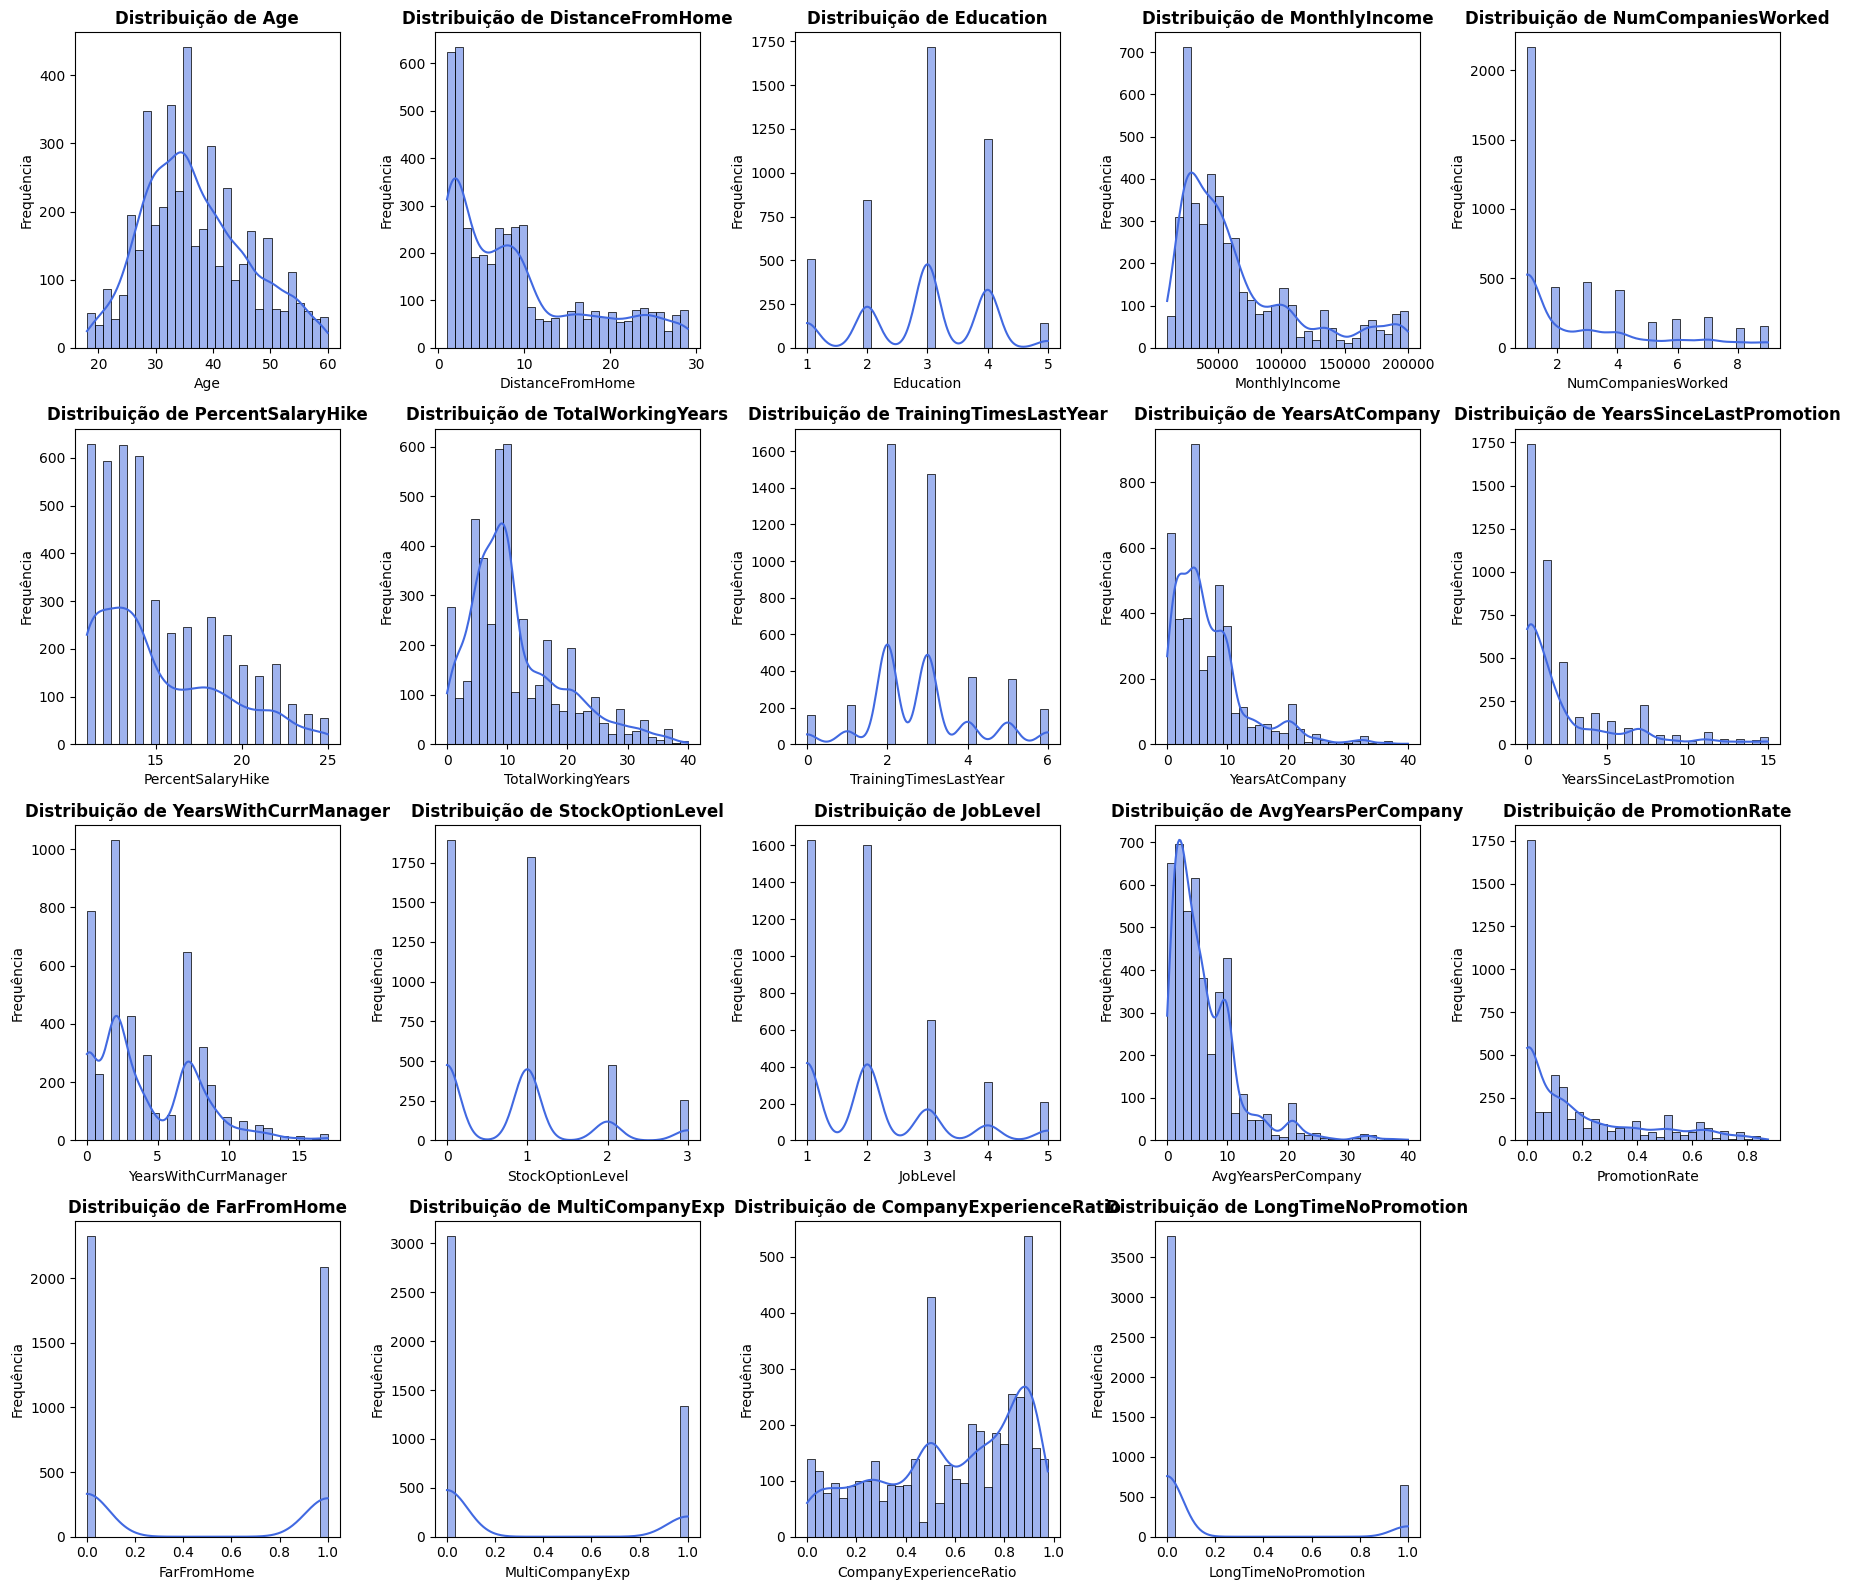

In [91]:
n_cols = 5
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if col in df.columns:
        sns.histplot(df[col], bins=30, kde=True, color="royalblue", ax=axes[i])
        axes[i].set_title(f"Distribuição de {col}", fontsize=12, fontweight="bold")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequência")

# Remove eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 6.3. Aplicar matriz de correlação

In [92]:
# Calcule a matriz de correlação de Pearson
correlation_matrix = df[numeric_cols].corr(method='pearson')

print("--- Matriz de Correlação de Pearson ---")
# O .round(2) é para exibir os valores com duas casas decimais, o que melhora a leitura
display(correlation_matrix.round(2))

--- Matriz de Correlação de Pearson ---


,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,StockOptionLevel,JobLevel,AvgYearsPerCompany,PromotionRate,FarFromHome,MultiCompanyExp,CompanyExperienceRatio,LongTimeNoPromotion
Age,1.00,0.01,-0.04,-0.04,0.30,-0.03,0.68,-0.03,0.31,0.22,0.20,-0.03,-0.00,0.26,-0.04,-0.01,0.25,-0.21,0.16
DistanceFromHome,0.01,1.00,-0.01,-0.02,-0.01,0.04,0.01,-0.01,0.03,0.00,0.02,0.01,-0.04,0.05,0.02,0.79,-0.01,0.04,-0.01
Education,-0.04,-0.01,1.00,0.01,-0.02,-0.04,-0.01,0.01,0.01,0.02,0.01,0.00,0.05,0.02,0.01,-0.02,-0.02,-0.01,0.02
MonthlyIncome,-0.04,-0.02,0.01,1.00,-0.02,0.00,-0.03,0.05,0.00,0.07,0.02,0.03,0.05,-0.03,0.07,0.00,-0.05,0.03,0.05
NumCompaniesWorked,0.30,-0.01,-0.02,-0.02,1.00,0.04,0.24,-0.04,-0.11,-0.04,-0.10,0.01,-0.00,-0.45,-0.15,-0.02,0.88,-0.45,-0.04
PercentSalaryHike,-0.03,0.04,-0.04,0.00,0.04,1.00,-0.02,-0.04,-0.03,-0.03,-0.04,0.01,0.01,-0.04,-0.01,0.03,0.02,-0.02,-0.01
TotalWorkingYears,0.68,0.01,-0.01,-0.03,0.24,-0.02,1.00,-0.04,0.63,0.40,0.46,0.00,-0.04,0.56,0.02,-0.00,0.19,-0.06,0.29
TrainingTimesLastYear,-0.03,-0.01,0.01,0.05,-0.04,-0.04,-0.04,1.00,-0.01,0.02,-0.01,-0.07,-0.03,0.01,0.00,0.00,-0.05,0.02,0.03
YearsAtCompany,0.31,0.03,0.01,0.00,-0.11,-0.03,0.63,-0.01,1.00,0.62,0.77,0.01,-0.06,0.78,0.29,0.01,-0.10,0.64,0.46
YearsSinceLastPromotion,0.22,0.00,0.02,0.07,-0.04,-0.03,0.40,0.02,0.62,1.00,0.51,0.02,-0.06,0.43,0.79,-0.01,-0.03,0.38,0.86


#### 6.3.1. Aplicar mapa de calor - Correlação de Person

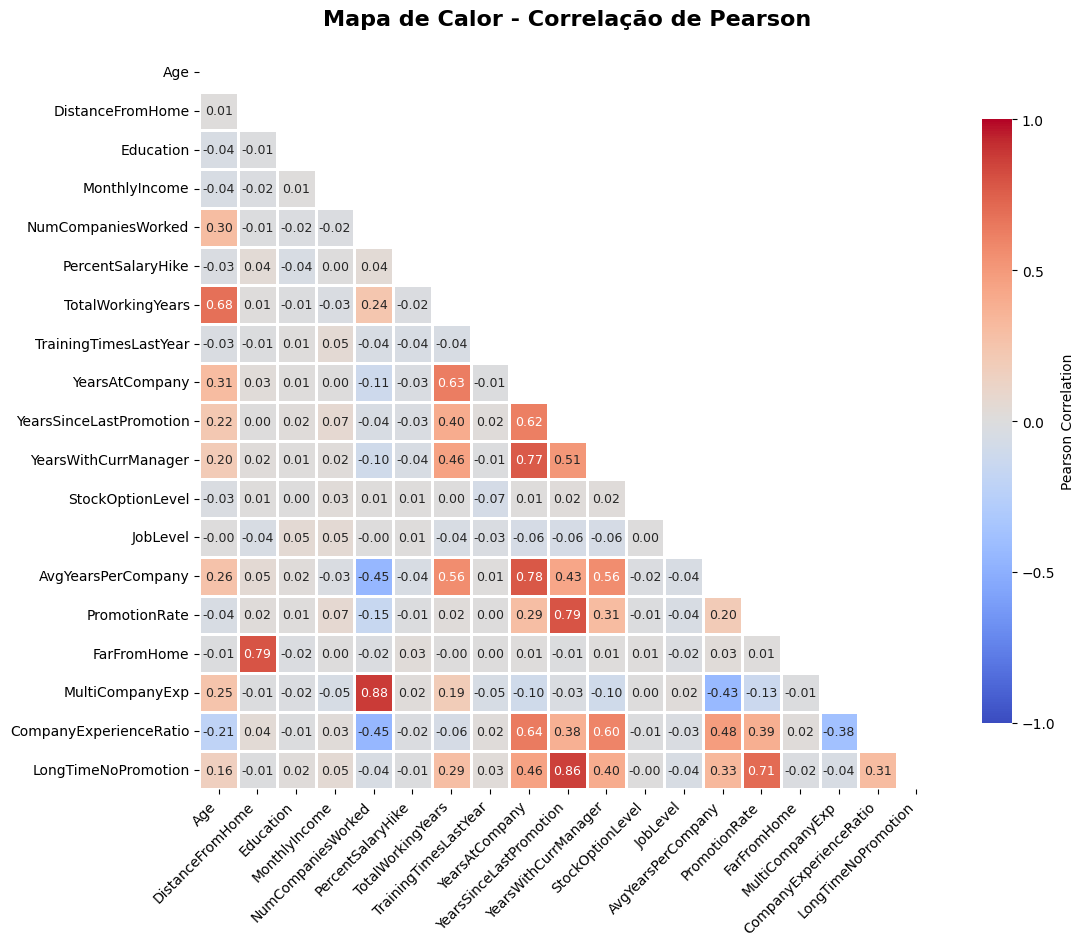

In [93]:
# Heatmap
plt.figure(figsize=(len(numeric_cols) * 0.6, len(numeric_cols) * 0.5))
mask_low_corr = (np.abs(correlation_matrix) < 0.1) & (correlation_matrix != 1.0)

sns.heatmap(
    correlation_matrix.round(2),
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.8,
    square=True,
    center=0,
    vmin=-1, vmax=1,
    cbar_kws={
        "shrink": 0.8,
        "label": "Pearson Correlation",
        "ticks": [-1, -0.5, 0, 0.5, 1]
        },
        annot_kws={
        "fontsize": 9
    }
)

plt.title("Mapa de Calor - Correlação de Pearson", fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.grid(False)
plt.tight_layout()
plt.show()

## 7. Aplicar técnica da análise

### 7.1. Utilizar aprendizado de máquina (supervisionado)

In [96]:
# Variável resposta
y = df['Attrition']  # 0 = Não, 1 = Sim

# Variáveis preditoras: apenas numéricas + dummies para categóricas
X = df.drop(columns=['Attrition'])  # retire colunas irrelevantes
X = pd.get_dummies(X, drop_first=True)  # transforma categóricas em variáveis dummy

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Padronização das variáveis numéricas
scaler = StandardScaler()
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

#### 7.1.1. Regressão logística

In [98]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("Acurácia:", accuracy_score(y_test, y_pred_lr))

Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       740
           1       0.55      0.11      0.19       142

    accuracy                           0.84       882
   macro avg       0.70      0.55      0.55       882
weighted avg       0.80      0.84      0.80       882

Acurácia: 0.8424036281179138


#### 7.1.2. Random Forest

In [100]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print("Acurácia:", accuracy_score(y_test, y_pred_rf))

Random Forest
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       740
           1       1.00      0.94      0.97       142

    accuracy                           0.99       882
   macro avg       0.99      0.97      0.98       882
weighted avg       0.99      0.99      0.99       882

Acurácia: 0.9897959183673469


#### 7.1.4. XGBoost

In [108]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost")
print(classification_report(y_test, y_pred_xgb))
print("Acurácia:", accuracy_score(y_test, y_pred_xgb))

c:\Users\Notebook\Documents\Git\laboratoria-ml-attrition\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:40:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       740
           1       1.00      0.98      0.99       142

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882

Acurácia: 0.9965986394557823
